In [10]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-diffadv-heat)

In [11]:
m, n = 60, 40
x, Dx, Dxx = FNC.diffper(m, [-1, 1])
y, Dy, Dyy = FNC.diffper(n, [-1, 1])
mtx, X, Y, vec, unvec, _ = FNC.tensorgrid(x, y)

Note that the initial condition should also be periodic on the domain.

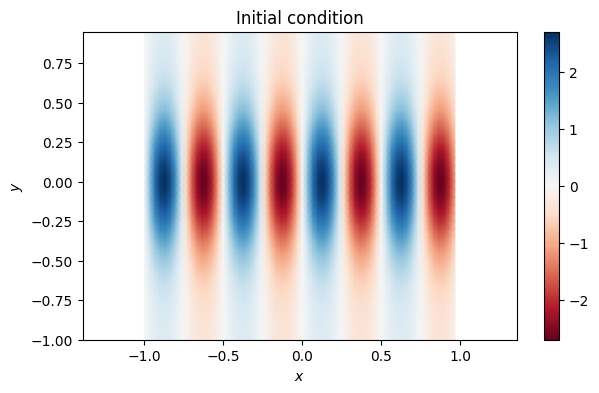

In [12]:
u_init = lambda x, y: sin(4 * pi * x) * exp(cos(pi * y))
U0 = mtx(u_init)
mx = max(abs(U0))
pcolormesh(X, Y, U0, vmin=-mx, vmax=mx, cmap="RdBu", shading="gouraud")
axis("equal"),  colorbar()
xlabel("$x$"),  ylabel("$y$")
title("Initial condition");

This function computes the time derivative for the unknowns. The actual calculations take place using the matrix shape.

In [13]:
alpha = 0.1
def du_dt(t, u):
    U = unvec(u)
    Uyy = Dxx @ U
    Uxx = U @ Dyy.T
    dU_dt = alpha * (Uxx + Uyy)  # PDE
    return vec(dU_dt)

Since this problem is parabolic, a stiff integrator is appropriate.

Text(0.5, 1.0, 'Heat equation, t=0.02')

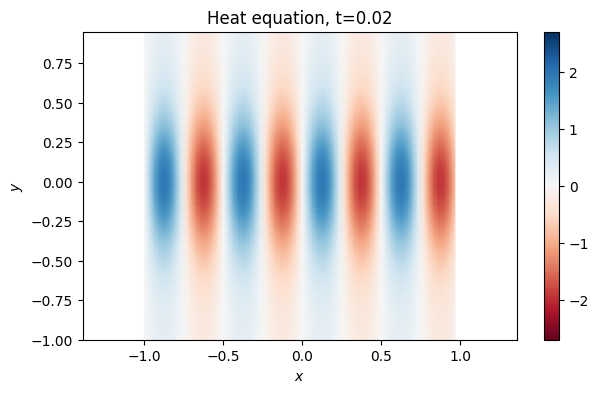

In [14]:
from scipy.integrate import solve_ivp
sol = solve_ivp(du_dt, (0, 0.2), vec(U0), method="BDF", dense_output=True)
U = lambda t: unvec(sol.sol(t))

pcolormesh(X.T, Y.T, U(0.02).T, 
    vmin=-mx, vmax=mx, cmap="RdBu", shading="gouraud")
axis("equal"),  colorbar()
xlabel("$x$"),  ylabel("$y$")
title("Heat equation, t=0.02")

Here is an animation of the solution.
```{tip}
:class: dropdown
Here `clims` are set so that colors remain at fixed values throughout the animation.
```

AttributeError: 'Axes' object has no attribute 'surface'

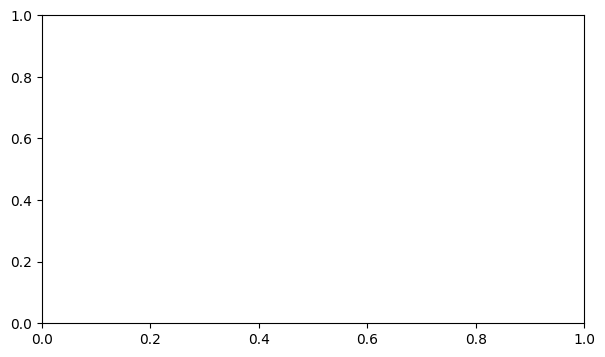

In [18]:
from matplotlib import animation
fig, ax = subplots()
obj = ax.pcolormesh(X, Y, U(0), vmin=-mx, vmax=mx, cmap="RdBu", shading="gouraud")
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
ax.set_xlabel("$x$"),  ax.set_ylabel("$y$")
ax.set_aspect("equal")
ax.set_title("Heat equation on a periodic domain")
def snapshot(t):
    global obj
    obj.remove()
    obj = ax.pcolormesh(X, Y, U(t), vmin=-mx, vmax=mx, cmap="RdBu", shading="gouraud")
    time_text.set_text(f"t = {t:.2f}")

anim = animation.FuncAnimation(fig, snapshot, frames=linspace(0, 0.2, 121))
anim.save("heat-2d.mp4", fps=30)
close()
